In [1]:
import os
import base64
from sqlalchemy import create_engine
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/karan.verma")
from verification_guardrails import get_type_of_text

In [2]:
data_from_s2r = pd.read_csv('/home/sanyam.sood/jupyter_lab_files/s2r_usable.csv')
# data_from_s2r.head()

In [24]:
data_from_transcribe = pd.read_csv('/home/sanyam.sood/jupyter_lab_files/transcribe_usable.csv')
# data_from_transcribe.head()

In [35]:
data_from_cx = pd.read_csv('/home/sanyam.sood/jupyter_lab_files/cx_usable.csv')
# data_from_cx.head()

In [5]:
data_from_hc = pd.read_csv('/home/sanyam.sood/jupyter_lab_files/hc_file.csv')

# S2R Plot 1


<AxesSubplot:xlabel='word_len', ylabel='Count'>

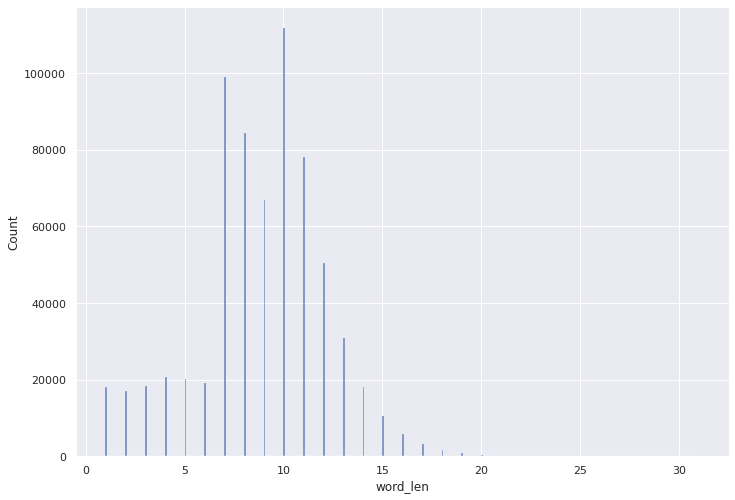

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")

data_from_s2r_less_6 = data_from_s2r[data_from_s2r.word_len<=6]
data_from_s2r_less_6 = data_from_s2r_less_6.sample(frac=0.08, random_state=10)

data_from_s2r_greater_6_less_10 = data_from_s2r[(data_from_s2r.word_len>6) & (data_from_s2r.word_len<=9)]
data_from_s2r_greater_6_less_10 = data_from_s2r_greater_6_less_10.sample(frac=0.45, random_state=14)

data_from_s2r_greater_9 = data_from_s2r[data_from_s2r.word_len>=10]

data_from_s2r_usable = pd.concat([data_from_s2r_less_6 ,data_from_s2r_greater_6_less_10 , data_from_s2r_greater_9])
sns.histplot(data_from_s2r_usable.word_len)

In [43]:
data_from_s2r_usable.describe()

,Unnamed: 0,Unnamed: 0.1,id,user_id,assigned,tag,flag_decode,hash,verified_time,upload_time,uploaded,verified,synced,last_modifed,length,word_len
count,6.761940e+05,6.761940e+05,6.761940e+05,676194.000000,676194.0,676194.000000,676194.0,676194.0,0.0,676194.0,676194.0,676194.0,676194.000000,0.0,676194.0,676194.000000
mean,8.514727e+05,8.514727e+05,2.301053e+07,205282.088528,1.0,42.129518,0.0,9.0,NaN,0.0,1.0,20.0,0.995427,NaN,0.0,8.846568
std,5.709035e+05,5.709035e+05,1.421754e+06,21892.813969,0.0,5.471729,0.0,0.0,NaN,0.0,0.0,0.0,0.067467,NaN,0.0,3.255934
min,0.000000e+00,0.000000e+00,1.772072e+07,11618.000000,1.0,37.000000,0.0,9.0,NaN,0.0,1.0,20.0,0.000000,NaN,0.0,1.000000
25%,4.065632e+05,4.065632e+05,2.179013e+07,205537.000000,1.0,39.000000,0.0,9.0,NaN,0.0,1.0,20.0,1.000000,NaN,0.0,7.000000
50%,7.089200e+05,7.089200e+05,2.328238e+07,210898.000000,1.0,39.000000,0.0,9.0,NaN,0.0,1.0,20.0,1.000000,NaN,0.0,9.000000
75%,1.194233e+06,1.194233e+06,2.396554e+07,215253.000000,1.0,51.000000,0.0,9.0,NaN,0.0,1.0,20.0,1.000000,NaN,0.0,11.000000
max,2.290118e+06,2.290118e+06,2.557538e+07,228383.000000,1.0,52.000000,0.0,9.0,NaN,0.0,1.0,20.0,1.000000,NaN,0.0,31.000000


# S2R Plot 2

<AxesSubplot:xlabel='word_len', ylabel='Count'>

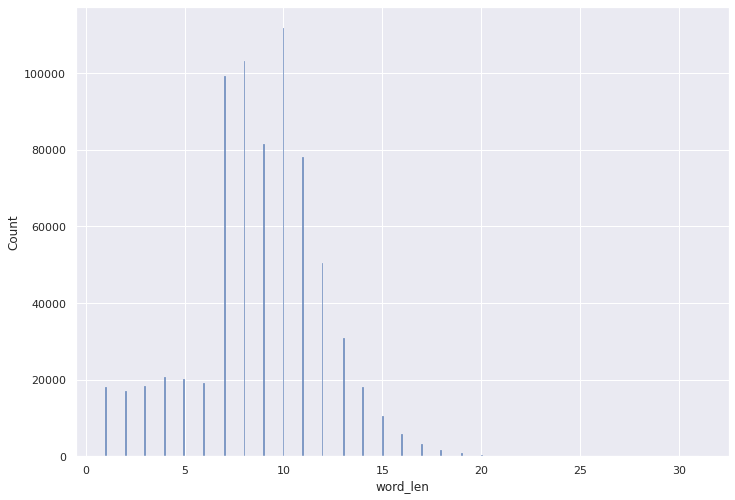

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")

arr = np.arange(3,63,2)

data_from_s2r_less_6 = data_from_s2r[data_from_s2r.word_len<=6]
data_from_s2r_less_6 = data_from_s2r_less_6.sample(frac=0.08, random_state=10)

data_from_s2r_7 = data_from_s2r[(data_from_s2r.word_len==7)]
data_from_s2r_7 = data_from_s2r_7.sample(frac=0.45, random_state=14)

data_from_s2r_8_9 = data_from_s2r[(data_from_s2r.word_len==8) | (data_from_s2r.word_len==9)]
data_from_s2r_8_9 = data_from_s2r_8_9.sample(frac=0.55, random_state=13)

data_from_s2r_greater_9 = data_from_s2r[data_from_s2r.word_len>=10]

data_from_s2r_usable = pd.concat([data_from_s2r_less_6 ,data_from_s2r_7 , data_from_s2r_8_9 ,data_from_s2r_greater_9])
sns.histplot(data_from_s2r_usable.word_len)

In [47]:
data_from_s2r_usable.describe()

,Unnamed: 0,Unnamed: 0.1,id,user_id,assigned,tag,flag_decode,hash,verified_time,upload_time,uploaded,verified,synced,last_modifed,length,word_len
count,7.097790e+05,7.097790e+05,7.097790e+05,709779.000000,709779.0,709779.000000,709779.0,709779.0,0.0,709779.0,709779.0,709779.0,709779.000000,0.0,709779.0,709779.000000
mean,8.497497e+05,8.497497e+05,2.300642e+07,205264.497782,1.0,42.118886,0.0,9.0,NaN,0.0,1.0,20.0,0.995401,NaN,0.0,8.826326
std,5.695930e+05,5.695930e+05,1.422810e+06,21849.149564,0.0,5.464662,0.0,0.0,NaN,0.0,0.0,0.0,0.067657,NaN,0.0,3.181217
min,0.000000e+00,0.000000e+00,1.772072e+07,11618.000000,1.0,37.000000,0.0,9.0,NaN,0.0,1.0,20.0,0.000000,NaN,0.0,1.000000
25%,4.052960e+05,4.052960e+05,2.178836e+07,205515.000000,1.0,39.000000,0.0,9.0,NaN,0.0,1.0,20.0,1.000000,NaN,0.0,7.000000
50%,7.081000e+05,7.081000e+05,2.328121e+07,210891.000000,1.0,39.000000,0.0,9.0,NaN,0.0,1.0,20.0,1.000000,NaN,0.0,9.000000
75%,1.189488e+06,1.189488e+06,2.395761e+07,215249.000000,1.0,51.000000,0.0,9.0,NaN,0.0,1.0,20.0,1.000000,NaN,0.0,11.000000
max,2.290118e+06,2.290118e+06,2.557538e+07,228383.000000,1.0,52.000000,0.0,9.0,NaN,0.0,1.0,20.0,1.000000,NaN,0.0,31.000000


# Transcribe Plot 

<AxesSubplot:xlabel='word_len', ylabel='Count'>

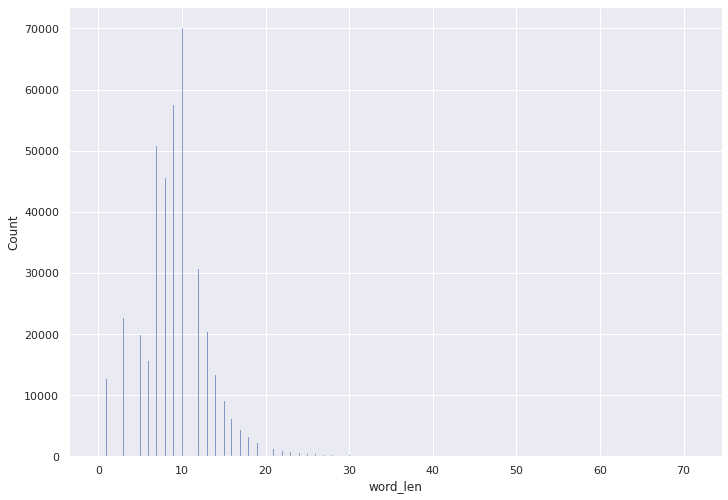

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")

data_length_less_6 = data_from_transcribe[data_from_transcribe.word_len<=6]
data_length_less_6 = data_length_less_6.sample(frac=0.09, random_state=10)

data_length_greater_6_less_10 = data_from_transcribe[(data_from_transcribe.word_len>6) & (data_from_transcribe.word_len<9) ]
data_length_greater_6_less_10 = data_length_greater_6_less_10.sample(frac=0.35, random_state=1)

data_length_9 = data_from_transcribe[data_from_transcribe.word_len==9]
data_length_9 = data_length_9.sample(frac=0.56, random_state=1)

data_length_greater_9 = data_from_transcribe[data_from_transcribe.word_len>9]

data_from_transcribe_usable = pd.concat([data_length_less_6, data_length_greater_6_less_10, data_length_greater_9 ,data_length_9])
sns.histplot(data_from_transcribe_usable.word_len)

# Clean Transcribe Data

<AxesSubplot:xlabel='word_len', ylabel='Count'>

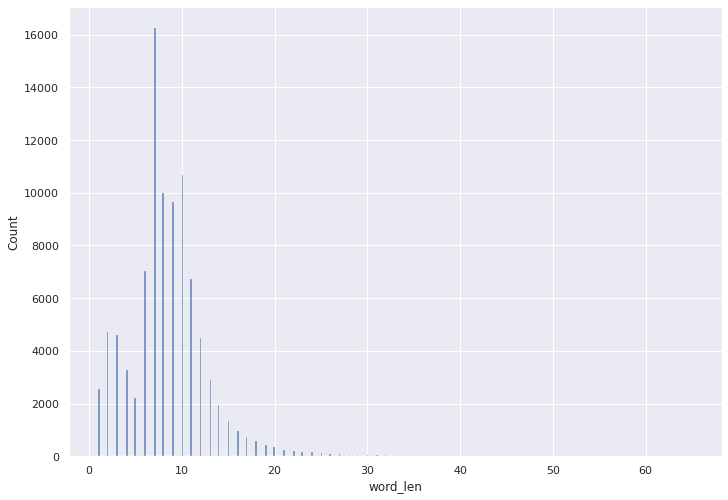

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")

data_from_transcribe_usable_clean_less_5 = data_from_transcribe_usable_clean[data_from_transcribe_usable_clean.word_len<=5]
data_from_transcribe_usable_clean_less_5 = data_from_transcribe_usable_clean_less_5.sample(frac=0.2)

data_from_transcribe_usable_clean_greater_5 = data_from_transcribe_usable_clean[data_from_transcribe_usable_clean.word_len>5]
data_from_transcribe_usable_clean_final = pd.concat ([data_from_transcribe_usable_clean_less_5, data_from_transcribe_usable_clean_greater_5])
sns.histplot(data_from_transcribe_usable_clean_final.word_len)

In [46]:
data_from_transcribe_usable_clean_final.type_of_text.value_counts()

0    92922
Name: type_of_text, dtype: int64

In [40]:
data_from_transcribe_usable_clean_final.word_len.describe()

count    92922.000000
mean         8.449786
std          4.367284
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         65.000000
Name: word_len, dtype: float64

In [7]:
pd.set_option('display.max_rows', None)  

data_from_transcribe_usable.word_len.value_counts()

10    70048
9     57426
7     50716
11    45917
8     45610
12    30724
2     23732
3     22694
4     21092
13    20319
5     19792
6     15634
14    13267
1     12692
15     9098
16     6117
17     4298
18     3107
19     2227
20     1623
21     1228
22      904
23      682
24      525
25      417
26      327
27      276
28      184
29      169
30      136
31      109
32      104
33       93
35       67
34       60
36       46
37       38
38       30
39       29
42       19
40       18
41       18
45       14
43       12
44        9
46        8
48        7
49        7
51        5
52        5
50        4
60        4
47        4
54        3
58        3
65        2
53        2
55        2
57        2
59        2
71        1
56        1
62        1
0         1
Name: word_len, dtype: int64

In [28]:
data_from_transcribe_usable.type_of_text.value_counts()

2    319103
0    162608
Name: type_of_text, dtype: int64

In [29]:
data_from_transcribe_usable_clean = data_from_transcribe_usable[data_from_transcribe_usable.type_of_text==0]

<AxesSubplot:xlabel='word_len', ylabel='Count'>

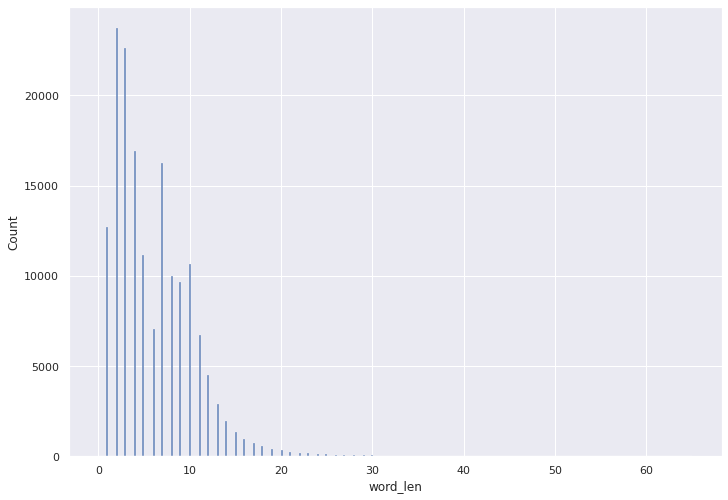

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")

sns.histplot(data_from_transcribe_usable_clean.word_len)

In [8]:
data_from_transcribe_usable.describe()

,Unnamed: 0,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,...,pre_processed,file_id,seq_id,test_data,lang,lang_lm,current_month_verification,srv_session_id,type_of_text,word_len
count,4.817110e+05,4.817110e+05,481711.0,481711.000000,481711.000000,481711.000000,481711.00000,481711.000000,481711.000000,0.0,...,481711.0,4.817110e+05,481711.0,481711.0,481711.0,481711.000000,481711.000000,0.0,481711.000000,481711.000000
mean,1.298916e+06,4.531859e+07,1.0,8.008763,6787.448354,283.989701,4295.47281,6436.245120,0.678779,NaN,...,0.0,4.999688e+07,0.0,0.0,1.0,0.042121,0.957342,NaN,1.324873,8.813172
std,6.733418e+05,1.262987e+06,0.0,5.728778,30.515182,2.329319,1691.63855,2256.448069,0.074797,NaN,...,0.0,2.885921e+07,0.0,0.0,0.0,0.406256,0.202086,NaN,0.945759,4.179069
min,3.000000e+00,4.196676e+07,1.0,1.000000,6708.000000,275.000000,0.00000,936.000000,0.000000,NaN,...,0.0,0.000000e+00,0.0,0.0,1.0,0.000000,0.000000,NaN,0.000000,0.000000
25%,7.304455e+05,4.428820e+07,1.0,7.000000,6770.000000,284.000000,5008.00000,4716.000000,0.631228,NaN,...,0.0,2.498854e+07,0.0,0.0,1.0,0.000000,1.000000,NaN,0.000000,7.000000
50%,1.311444e+06,4.530079e+07,1.0,7.000000,6786.000000,285.000000,5038.00000,5976.000000,0.687216,NaN,...,0.0,4.998938e+07,0.0,0.0,1.0,0.000000,1.000000,NaN,2.000000,9.000000
75%,1.894932e+06,4.640453e+07,1.0,8.000000,6813.000000,285.000000,5065.00000,7452.000000,0.734374,NaN,...,0.0,7.501133e+07,0.0,0.0,1.0,0.000000,1.000000,NaN,2.000000,11.000000
max,2.407774e+06,4.783642e+07,1.0,18.000000,6839.000000,285.000000,5094.00000,15444.000000,0.874107,NaN,...,0.0,9.999923e+07,0.0,0.0,1.0,8.000000,1.000000,NaN,2.000000,71.000000


<AxesSubplot:xlabel='word_len', ylabel='Count'>

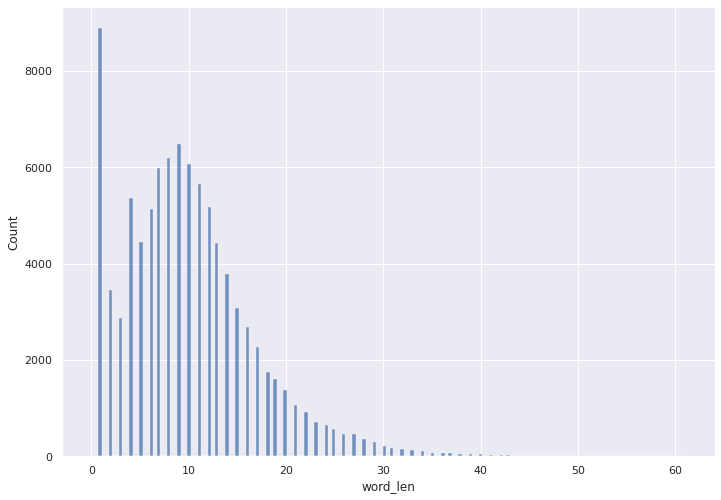

In [9]:
sns.histplot(data_from_cx.word_len)

In [49]:
data_from_cx.describe()

,Unnamed: 0,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,...,pre_processed,file_id,seq_id,test_data,lang,lang_lm,current_month_verification,srv_session_id,type_of_text,word_len
count,93402.000000,9.340200e+04,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,0.0,...,93402.0,9.340200e+04,93402.000000,93402.000000,93402.0,93402.000000,93402.000000,0.0,93402.000000,93402.000000
mean,87487.680681,4.313887e+07,0.358547,3.181452,6730.026830,279.167844,574.196409,4371.519539,0.711320,NaN,...,0.0,3.068471e+08,16.122438,0.027730,1.0,0.034678,0.539935,NaN,0.077600,10.044485
std,46548.866992,1.615536e+05,0.479576,3.688563,16.399707,3.708385,538.577350,2381.325375,0.077854,NaN,...,0.0,4.118105e+08,29.626809,0.525861,0.0,0.336860,0.498405,NaN,0.386238,6.789485
min,0.000000,4.290829e+07,0.000000,1.000000,6715.000000,277.000000,0.000000,0.000000,0.242651,NaN,...,0.0,0.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,NaN,0.000000,0.000000
25%,47624.750000,4.303265e+07,0.000000,1.000000,6717.000000,277.000000,169.000000,3096.000000,0.671900,NaN,...,0.0,0.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,NaN,0.000000,5.000000
50%,91252.500000,4.308380e+07,0.000000,1.000000,6721.000000,277.000000,695.000000,4104.000000,0.719747,NaN,...,0.0,0.000000e+00,5.000000,0.000000,1.0,0.000000,1.000000,NaN,0.000000,9.000000
75%,126102.750000,4.318935e+07,1.000000,8.000000,6744.000000,278.000000,803.000000,5076.000000,0.761717,NaN,...,0.0,8.197667e+08,20.000000,0.000000,1.0,0.000000,1.000000,NaN,0.000000,13.000000
max,163988.000000,4.344134e+07,1.000000,18.000000,6760.000000,286.000000,5024.000000,16091.000000,0.874107,NaN,...,0.0,9.048468e+08,457.000000,10.000000,1.0,8.000000,1.000000,NaN,2.000000,61.000000


# S2R Plot 3

<AxesSubplot:xlabel='word_len', ylabel='Count'>

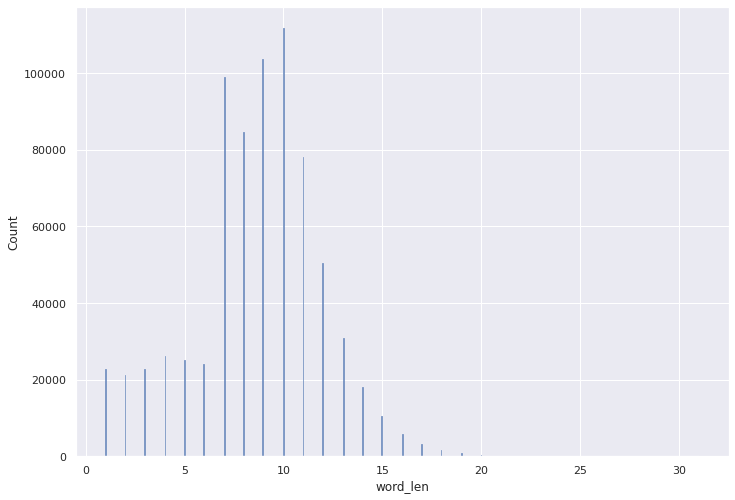

In [148]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")

data_from_s2r_less_6 = data_from_s2r[data_from_s2r.word_len<=6]
data_from_s2r_less_6 = data_from_s2r_less_6.sample(frac=0.1, random_state=10)

data_from_s2r_greater_6_less_9 = data_from_s2r[(data_from_s2r.word_len>6) & (data_from_s2r.word_len<9)]
data_from_s2r_greater_6_less_9 = data_from_s2r_greater_6_less_9.sample(frac=0.45, random_state=14)

data_from_s2r_9 = data_from_s2r[data_from_s2r.word_len==9]
data_from_s2r_9 = data_from_s2r_9.sample(frac=0.7, random_state=14)

data_from_s2r_greater_9 = data_from_s2r[data_from_s2r.word_len>=10]

data_from_s2r_usable = pd.concat([data_from_s2r_less_6 ,data_from_s2r_greater_6_less_9 , data_from_s2r_9 ,data_from_s2r_greater_9])
sns.histplot(data_from_s2r_usable.word_len)

# Making Combined Plots

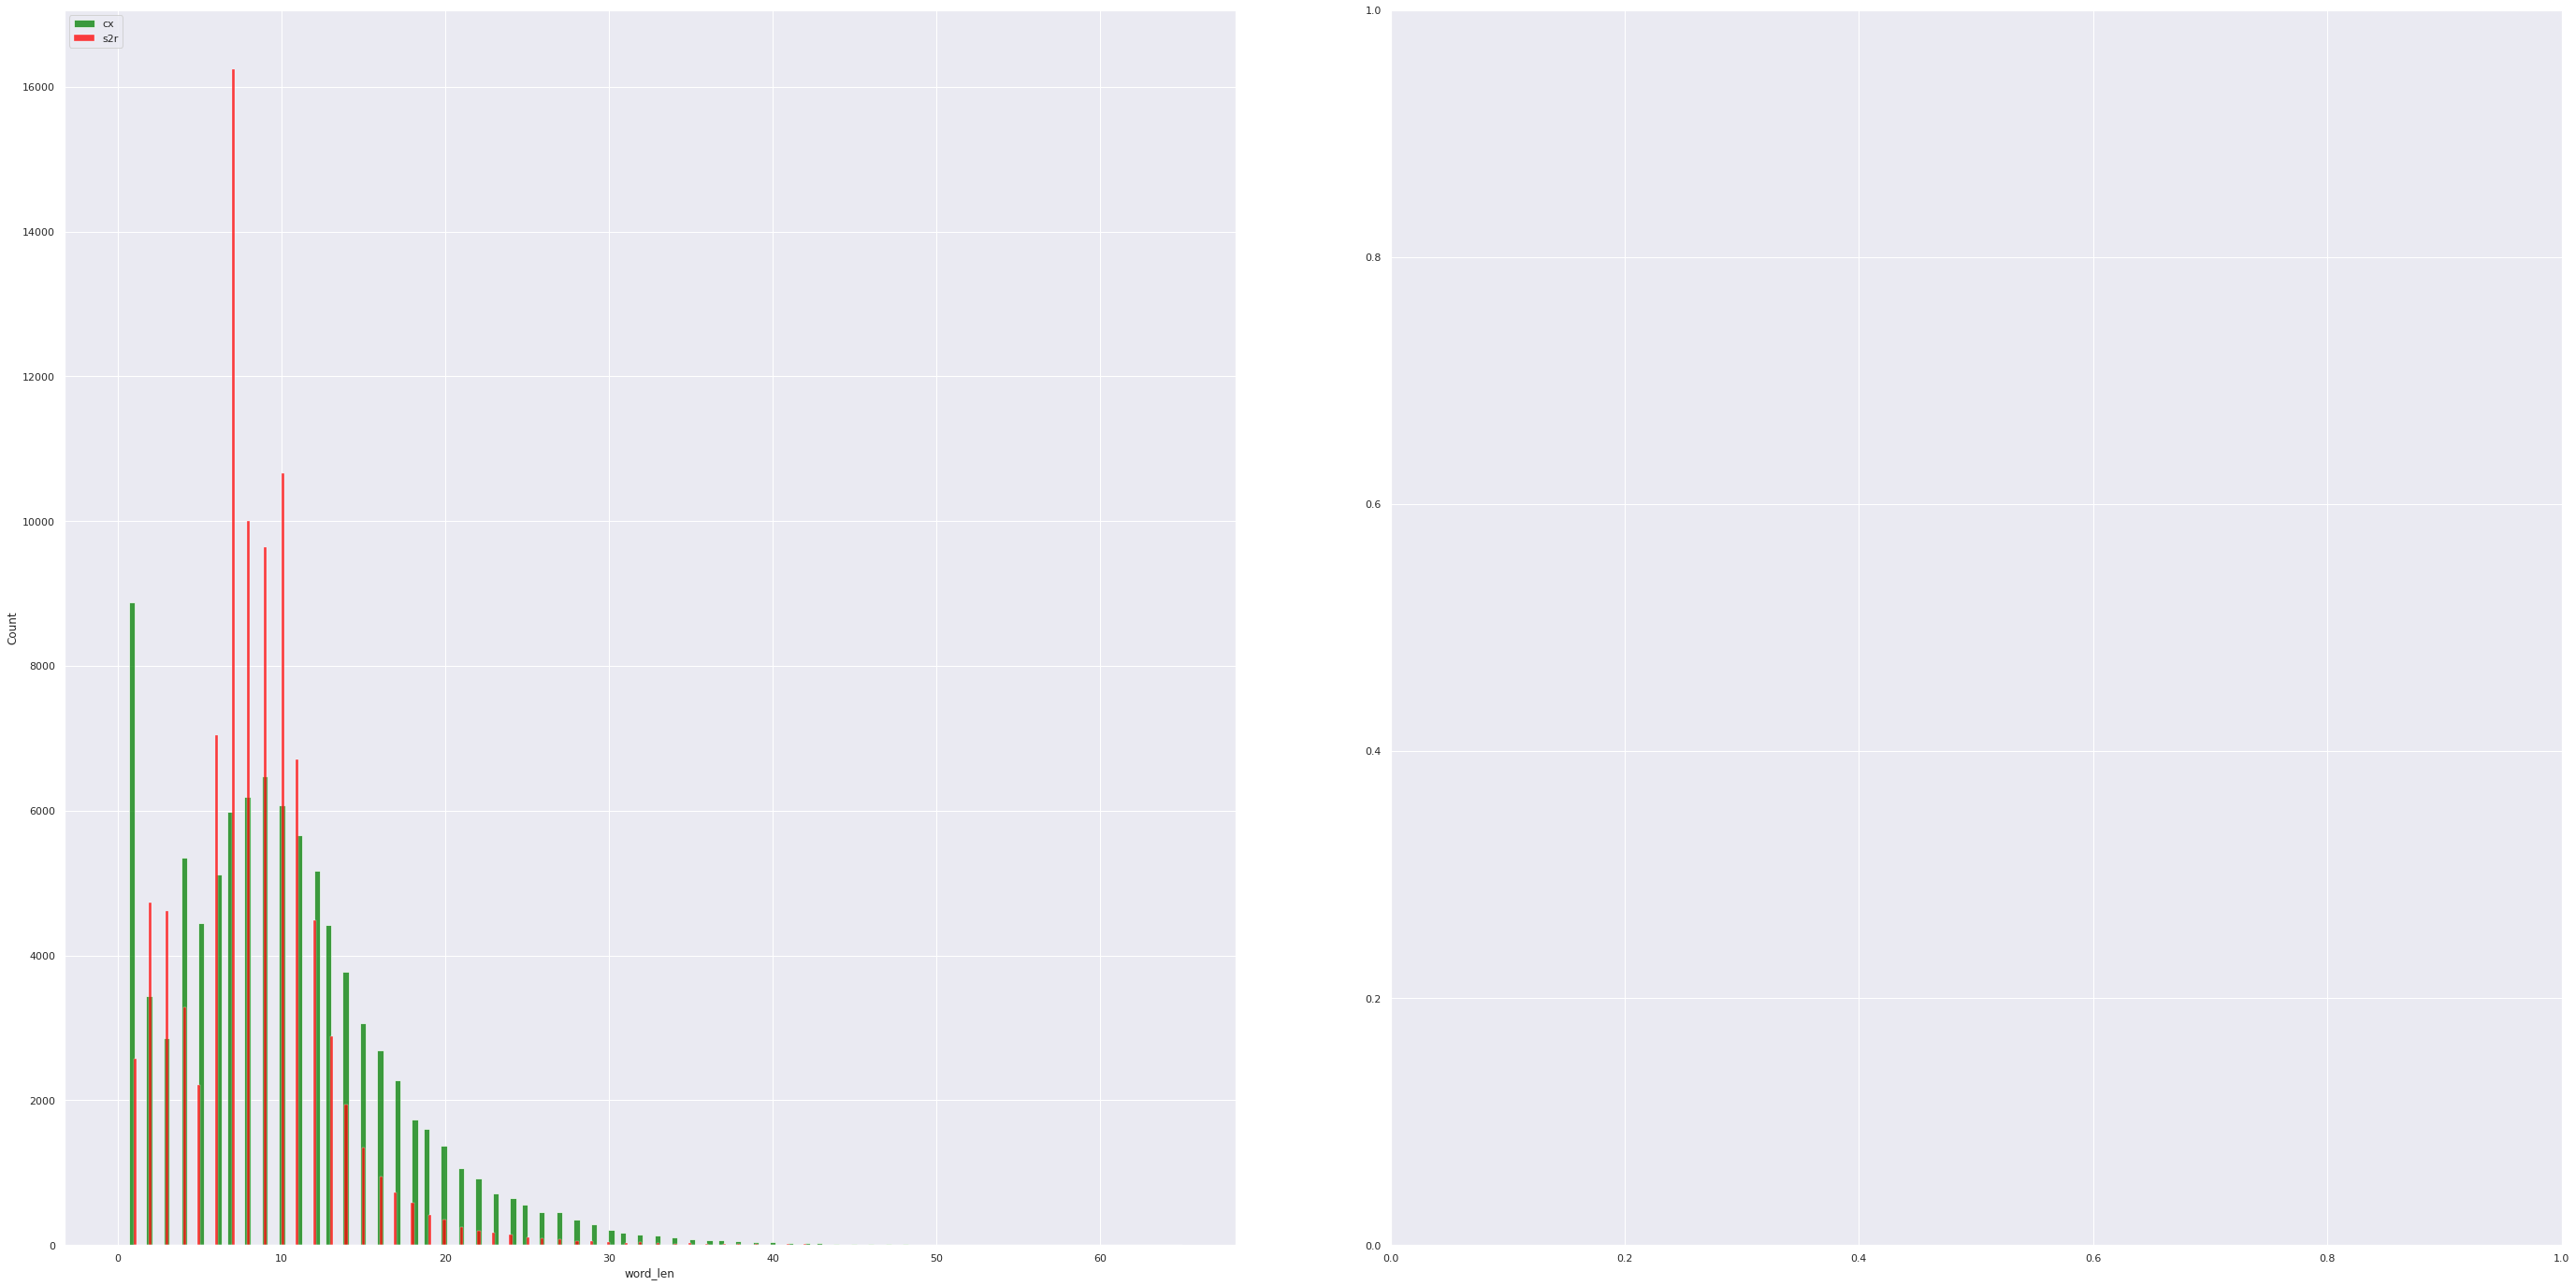

In [39]:
fig, axs = plt.subplots(1,2)

fig.tight_layout()
fig.set_figheight(20)
fig.set_figwidth(40)

sns.histplot(data_from_cx.word_len, color ="green", label="cx",  ax=axs[0])
axs[0].legend(loc="upper left")
sns.histplot(data_from_transcribe_usable_clean_final.word_len, color ="red", label="s2r",  ax=axs[0])
axs[0].legend(loc="upper left")

# sns.histplot(data_from_cx.word_len, color ="green", label="cx",  ax=axs[1])
# axs[1].legend(loc="upper left")
# sns.histplot(data_from_transcribe_usable.word_len, color ="red", label="transcribe",  ax=axs[1])
# axs[1].legend(loc="upper left")


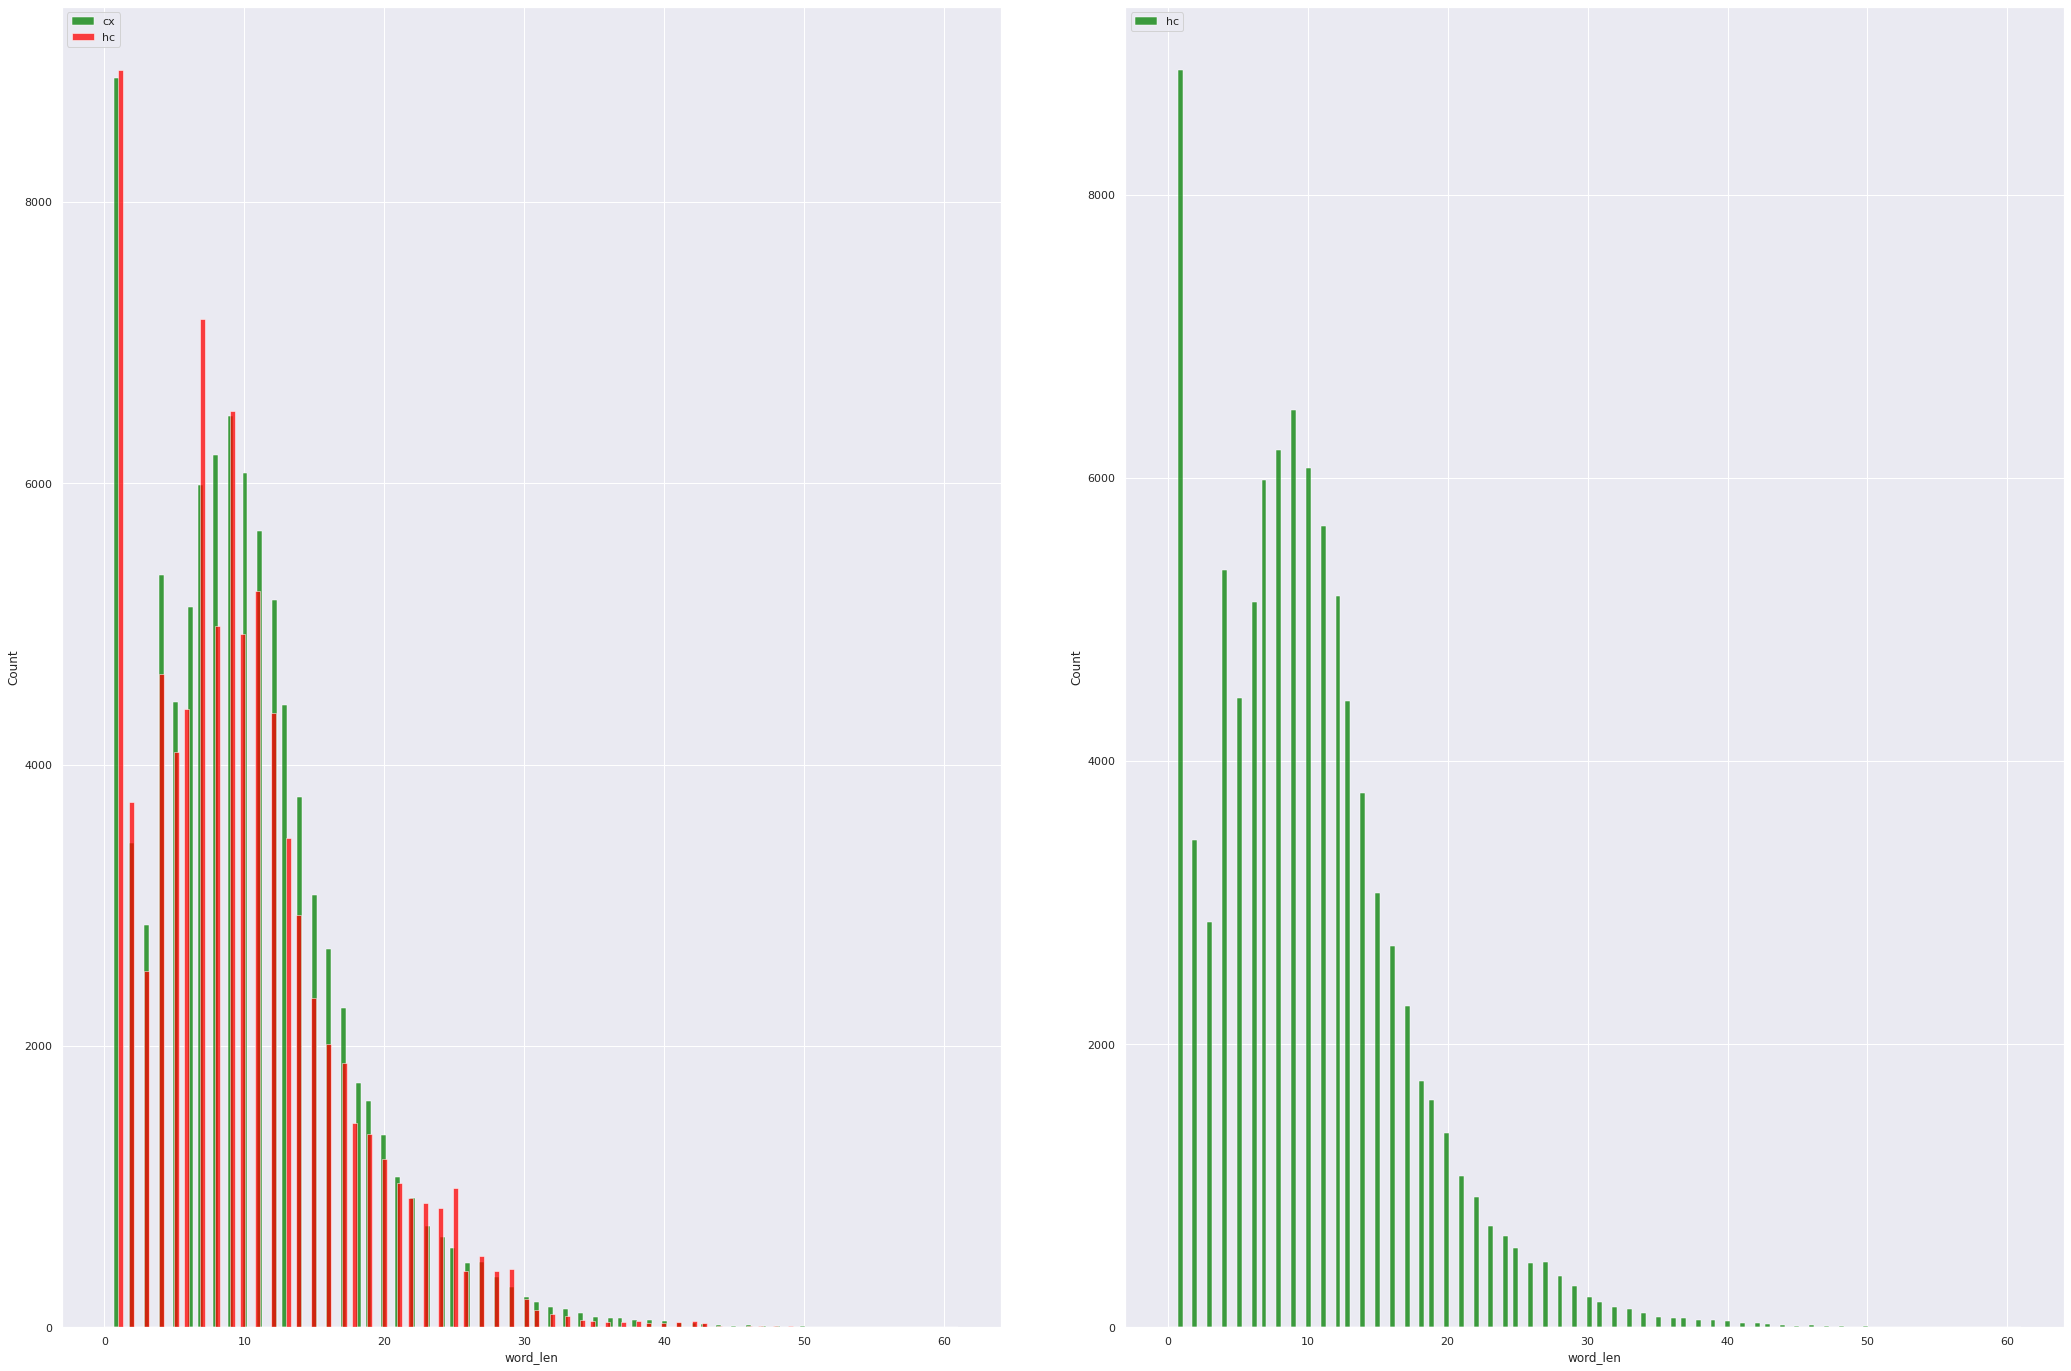

In [7]:
fig, axs = plt.subplots(1,2)

fig.tight_layout()
fig.set_figheight(20)
fig.set_figwidth(30)

sns.histplot(data_from_cx.word_len, color ="green", label="cx",  ax=axs[0])
axs[0].legend(loc="upper left")
sns.histplot(data_from_hc_usable.word_len, color ="red", label="hc",  ax=axs[0])
axs[0].legend(loc="upper left")

sns.histplot(data_from_cx.word_len, color ="green", label="hc",  ax=axs[1])
axs[1].legend(loc="upper left")


## Sampling CX

<AxesSubplot:xlabel='word_len', ylabel='Count'>

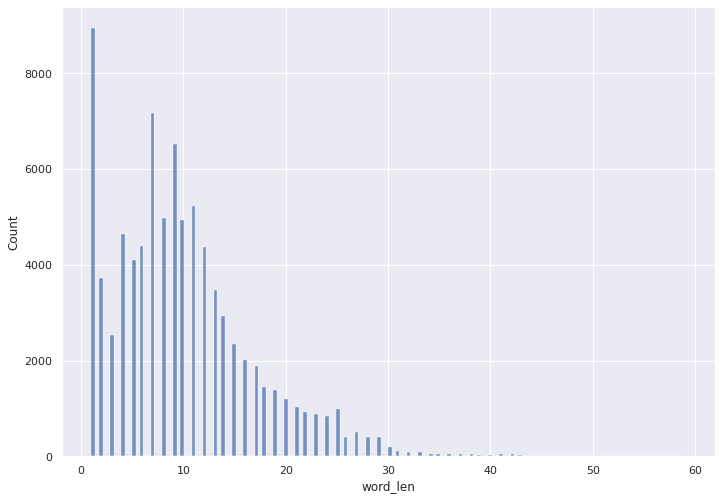

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")

data_from_hc_less_4 = data_from_hc[(data_from_hc.word_len<=3) & (data_from_hc.word_len>=1)]
data_from_hc_less_4 = data_from_hc_less_4.sample(frac=0.1, random_state=5)

data_from_hc_greater_3_less_7 = data_from_hc[(data_from_hc.word_len>=4) & (data_from_hc.word_len<=6)]
data_from_hc_greater_3_less_7 = data_from_hc_greater_3_less_7.sample(frac=0.2, random_state=14)

data_from_hc_7_8 = data_from_hc[(data_from_hc.word_len==7) | (data_from_hc.word_len==8)]
data_from_hc_7_8 = data_from_hc_7_8.sample(frac=0.4)

data_from_hc_7_less_10 = data_from_hc[(data_from_hc.word_len>8)&(data_from_hc.word_len<=10)]
data_from_hc_7_less_10 = data_from_hc_7_less_10.sample(frac=0.75, random_state=12)

data_hc_greater_10 = data_from_hc[(data_from_hc.word_len>10) &(data_from_hc.word_len<=25)]

data_hc_greater_25 = data_from_hc[(data_from_hc.word_len>25)]
data_hc_greater_25 = data_hc_greater_25.sample(frac=0.3, random_state=5) #0.5

data_from_hc_usable = pd.concat([data_from_hc_less_4, data_from_hc_greater_3_less_7, data_from_hc_7_8 ,data_from_hc_7_less_10, data_hc_greater_10, data_hc_greater_25 ])
sns.histplot(data_from_hc_usable.word_len)



# Descriptions of Different Datas

In [25]:
data_from_cx.describe()

,Unnamed: 0,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,...,pre_processed,file_id,seq_id,test_data,lang,lang_lm,current_month_verification,srv_session_id,type_of_text,word_len
count,93402.000000,9.340200e+04,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,0.0,...,93402.0,9.340200e+04,93402.000000,93402.000000,93402.0,93402.000000,93402.000000,0.0,93402.000000,93402.000000
mean,87487.680681,4.313887e+07,0.358547,3.181452,6730.026830,279.167844,574.196409,4371.519539,0.711320,NaN,...,0.0,3.068471e+08,16.122438,0.027730,1.0,0.034678,0.539935,NaN,0.077600,10.044485
std,46548.866992,1.615536e+05,0.479576,3.688563,16.399707,3.708385,538.577350,2381.325375,0.077854,NaN,...,0.0,4.118105e+08,29.626809,0.525861,0.0,0.336860,0.498405,NaN,0.386238,6.789485
min,0.000000,4.290829e+07,0.000000,1.000000,6715.000000,277.000000,0.000000,0.000000,0.242651,NaN,...,0.0,0.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,NaN,0.000000,0.000000
25%,47624.750000,4.303265e+07,0.000000,1.000000,6717.000000,277.000000,169.000000,3096.000000,0.671900,NaN,...,0.0,0.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,NaN,0.000000,5.000000
50%,91252.500000,4.308380e+07,0.000000,1.000000,6721.000000,277.000000,695.000000,4104.000000,0.719747,NaN,...,0.0,0.000000e+00,5.000000,0.000000,1.0,0.000000,1.000000,NaN,0.000000,9.000000
75%,126102.750000,4.318935e+07,1.000000,8.000000,6744.000000,278.000000,803.000000,5076.000000,0.761717,NaN,...,0.0,8.197667e+08,20.000000,0.000000,1.0,0.000000,1.000000,NaN,0.000000,13.000000
max,163988.000000,4.344134e+07,1.000000,18.000000,6760.000000,286.000000,5024.000000,16091.000000,0.874107,NaN,...,0.0,9.048468e+08,457.000000,10.000000,1.0,8.000000,1.000000,NaN,2.000000,61.000000


In [44]:
data_from_cx.word_len.describe()

count    93402.000000
mean        10.044485
std          6.789485
min          0.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         61.000000
Name: word_len, dtype: float64

In [46]:
data_from_transcribe_usable.word_len.describe()

count    481711.000000
mean          8.813172
std           4.179069
min           0.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          71.000000
Name: word_len, dtype: float64

In [47]:
data_from_s2r_usable.word_len.describe()

count    741683.000000
mean          8.651791
std           3.286517
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          31.000000
Name: word_len, dtype: float64

In [53]:
data_from_hc_usable.word_len.describe()

count    85557.000000
mean         9.907360
std          6.947828
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         59.000000
Name: word_len, dtype: float64

In [54]:
data_from_hc_usable.columns

Index(['Unnamed: 0', 'text_id', 'uploaded', 'verified', 'user_id', 'tag',
       'verified_by', 'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id', 'utf_text_decoded',
       'word_len'],
      dtype='object')

In [55]:
data_from_hc_usable.drop(['utf_text_decoded'], axis = 1) 

# Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
#        'length', 'confidence', 'uploaded_time', 'verified_time',
#        'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
#        'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
#        'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
#        'current_month_verification', 'srv_session_id'],
#       dtype='object')

,Unnamed: 0,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,...,pre_processed,file_id,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id,word_len
77272,99596,47459150,1,43,511,291,0,7920,0.817754,NaN,...,0,2,0,0,1,0,b'NA',0,NaN,1
219907,294914,47929619,1,43,511,291,0,900,0.794938,NaN,...,0,4,0,0,1,0,b'NA',0,NaN,1
8418,10728,47364426,1,43,511,291,0,3168,0.785173,NaN,...,0,1,0,0,1,0,b'NA',0,NaN,1
127220,166847,47530907,1,43,511,291,0,5976,0.742643,NaN,...,0,2,0,0,1,0,b'NA',0,NaN,3
38367,48953,47405044,1,43,511,291,0,7812,0.624630,NaN,...,0,8,0,0,1,0,b'NA',0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176841,233196,47601981,1,43,511,291,0,12816,0.727333,NaN,...,0,3,0,0,1,0,b'NA',0,NaN,28
125343,164408,47528284,1,43,511,291,0,9972,0.695445,NaN,...,0,0,0,0,1,0,b'NA',0,NaN,26
37986,48445,47404516,1,43,511,291,0,15084,0.726396,NaN,...,0,6,0,0,1,0,b'NA',0,NaN,36
128611,168603,47532786,1,43,511,291,0,10080,0.874107,NaN,...,0,6,0,0,1,0,b'NA',0,NaN,26


In [56]:
data_from_hc_usable.drop(data_from_hc_usable.columns[[0]], axis = 1, inplace = True) 


In [57]:
data_from_hc_usable.columns

Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
       'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id', 'utf_text_decoded',
       'word_len'],
      dtype='object')

In [58]:
data_from_hc_usable.drop(data_from_hc_usable.columns[[-1]], axis = 1, inplace = True) 


In [59]:
data_from_hc_usable.columns

Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
       'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id', 'utf_text_decoded'],
      dtype='object')

In [60]:
data_from_hc_usable.drop(data_from_hc_usable.columns[[-1]], axis = 1, inplace = True) 
data_from_hc_usable.columns

# Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
#        'length', 'confidence', 'uploaded_time', 'verified_time',
#        'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
#        'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
#        'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
#        'current_month_verification', 'srv_session_id'],
#       dtype='object')


Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
       'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id'],
      dtype='object')

In [62]:
data_from_hc_usable['length']/= 10
data_from_hc_usable['length']= data_from_hc_usable['length'].astype('int')


In [64]:
pd.set_option('display.max_columns', None)  
data_from_hc_usable.head()

,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,verified_time,last_modified_time,base_dir,utf_text,corrected_utf_text,hindi_text,audio_file,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id
77272,47459150,1,43,511,291,0,792,0.817754,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KS54KWH4KSy4KWL',b'4KS54KWH4KSy4KWL',NaN,b'api_HI_CX_23Sep20/app_13970596_858466432.mp3',NaN,0,2,0,0,1,0,b'NA',0,NaN
219907,47929619,1,43,511,291,0,90,0.794938,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSv4KS4',b'4KSv4KS4',NaN,b'api_HI_CX_30Sep20/app_13970596_858656584.mp3',NaN,0,4,0,0,1,0,b'NA',0,NaN
8418,47364426,1,43,511,291,0,316,0.785173,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSv4KS4',b'4KSv4KS4',NaN,b'api_HI_CX_23Sep20/app_13970596_858567531.mp3',NaN,0,1,0,0,1,0,b'NA',0,NaN
127220,47530907,1,43,511,291,0,597,0.742643,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSV4KWI4KSC4KS44KS_4KSyIOCkleCksOCkqOCkviDg...,b'4KSV4KWI4KSC4KS44KS_4KSyIOCkleCksOCkqOCkviDg...,NaN,b'api_HI_CX_23Sep20/app_13970596_858388832.mp3',NaN,0,2,0,0,1,0,b'NA',0,NaN
38367,47405044,1,43,511,291,0,781,0.624630,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSv4KS-',b'4KSv4KS-',NaN,b'api_HI_CX_23Sep20/app_13970596_858524298.mp3',NaN,0,8,0,0,1,0,b'NA',0,NaN


In [100]:
# data_from_hc_usable['base_dir'] = data_from_hc_usable['base_dir'].str.decode('utf-8')
# data_from_hc_usable['utf_text'] = data_from_hc_usable['utf_text'].str.decode('utf-8') 

# data_from_hc_usable['corrected_utf_text'] = data_from_hc_usable['corrected_utf_text'].str.decode('utf-8', errors='ignore') 
data_from_hc_usable['audio_file'] = data_from_hc_usable['audio_file'].str.decode('utf-8').fillna(data_from_hc_usable['audio_file']) 

# data_from_hc_usable[['base_dir', 'utf_text', 'corrected_utf_text', 'audio_file']] = data_from_hc_usable[['base_dir', 'utf_text', 'corrected_utf_text', 'audio_file']].astype(str)


In [108]:
data_from_hc_usable.head()
# data_from_hc_usable.to_csv('/home/sanyam.sood/jupyter_lab_files/temp_hc_usable.csv')


,Unnamed: 0,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,verified_time,last_modified_time,base_dir,utf_text,corrected_utf_text,hindi_text,audio_file,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id
0,77272,47459150,1,43,511,291,0,792,0.817754,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KS54KWH4KSy4KWL',b'4KS54KWH4KSy4KWL',NaN,b'api_HI_CX_23Sep20/app_13970596_858466432.mp3',NaN,0,2,0,0,1,0,NaN,0,NaN
1,219907,47929619,1,43,511,291,0,90,0.794938,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSv4KS4',b'4KSv4KS4',NaN,b'api_HI_CX_30Sep20/app_13970596_858656584.mp3',NaN,0,4,0,0,1,0,NaN,0,NaN
2,8418,47364426,1,43,511,291,0,316,0.785173,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSv4KS4',b'4KSv4KS4',NaN,b'api_HI_CX_23Sep20/app_13970596_858567531.mp3',NaN,0,1,0,0,1,0,NaN,0,NaN
3,127220,47530907,1,43,511,291,0,597,0.742643,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSV4KWI4KSC4KS44KS_4KSyIOCkleCksOCkqOCkviDg...,b'4KSV4KWI4KSC4KS44KS_4KSyIOCkleCksOCkqOCkviDg...,NaN,b'api_HI_CX_23Sep20/app_13970596_858388832.mp3',NaN,0,2,0,0,1,0,NaN,0,NaN
4,38367,47405044,1,43,511,291,0,781,0.624630,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSv4KS-',b'4KSv4KS-',NaN,b'api_HI_CX_23Sep20/app_13970596_858524298.mp3',NaN,0,8,0,0,1,0,NaN,0,NaN


In [130]:
data_from_hc_usable = pd.read_csv('/home/sanyam.sood/jupyter_lab_files/temp_hc_usable.csv')
data_from_hc_usable.head()

,Unnamed: 0,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,verified_time,last_modified_time,base_dir,utf_text,corrected_utf_text,hindi_text,audio_file,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id
0,77272,47459150,1,43,511,291,0,792,0.817754,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KS54KWH4KSy4KWL',b'4KS54KWH4KSy4KWL',NaN,b'api_HI_CX_23Sep20/app_13970596_858466432.mp3',NaN,0,2,0,0,1,0,NaN,0,NaN
1,219907,47929619,1,43,511,291,0,90,0.794938,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSv4KS4',b'4KSv4KS4',NaN,b'api_HI_CX_30Sep20/app_13970596_858656584.mp3',NaN,0,4,0,0,1,0,NaN,0,NaN
2,8418,47364426,1,43,511,291,0,316,0.785173,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSv4KS4',b'4KSv4KS4',NaN,b'api_HI_CX_23Sep20/app_13970596_858567531.mp3',NaN,0,1,0,0,1,0,NaN,0,NaN
3,127220,47530907,1,43,511,291,0,597,0.742643,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSV4KWI4KSC4KS44KS_4KSyIOCkleCksOCkqOCkviDg...,b'4KSV4KWI4KSC4KS44KS_4KSyIOCkleCksOCkqOCkviDg...,NaN,b'api_HI_CX_23Sep20/app_13970596_858388832.mp3',NaN,0,2,0,0,1,0,NaN,0,NaN
4,38367,47405044,1,43,511,291,0,781,0.624630,NaN,NaN,NaN,b'livtranscription/transcription-gluster-audio/',b'4KSv4KS-',b'4KSv4KS-',NaN,b'api_HI_CX_23Sep20/app_13970596_858524298.mp3',NaN,0,8,0,0,1,0,NaN,0,NaN


# Table Creation for High Confidence

In [134]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd

tableName   = "data_transcribe_hc_cx_exper_05102020"

userid = 'Transcriber@transcription-prod'
passwd = 'TranscribePass1'
ipaddr = 'transcription-prod.mysql.database.azure.com'
db_name = 'speech_transcribe'
dest_sql = "mysql+mysqldb://" + userid + ":" + passwd + "@" + ipaddr + "/" + db_name + "?charset=utf8&use_unicode=0"
sql_engine = create_engine(dest_sql,pool_recycle=3600)
db_connection    = sql_engine.connect()

try:
    frame = data_from_hc_usable.to_sql(tableName, db_connection, if_exists='fail');
except ValueError as vx:
    print(vx)
except Exception as ex:   
    print(ex)
else:
    print("Table %s created successfully."%tableName);   
finally:
    db_connection.close()

Table data_transcribe_hc_cx_exper_05102020 created successfully.


In [81]:
db_connection    = sql_engine.connect()
data_hc_desc = pd.read_sql("DESCRIBE data_transcribe_hc_cx_exp_05102020", db_connection)
data_hc_desc

,Field,Type,Null,Key,Default,Extra
0,b'index',b'bigint(20)',b'YES',b'MUL',None,b''
1,b'text_id',b'bigint(20)',b'YES',b'',None,b''
2,b'uploaded',b'bigint(20)',b'YES',b'',None,b''
3,b'verified',b'bigint(20)',b'YES',b'',None,b''
4,b'user_id',b'bigint(20)',b'YES',b'',None,b''
5,b'tag',b'bigint(20)',b'YES',b'',None,b''
6,b'verified_by',b'bigint(20)',b'YES',b'',None,b''
7,b'length',b'bigint(20)',b'YES',b'',None,b''
8,b'confidence',b'double',b'YES',b'',None,b''
9,b'uploaded_time',b'double',b'YES',b'',None,b''


In [131]:
def fn(text):
    return text[2:-1]

data_from_hc_usable['base_dir']= data_from_hc_usable['base_dir'].apply(fn)
data_from_hc_usable['audio_file']= data_from_hc_usable['audio_file'].apply(fn)
data_from_hc_usable['utf_text']= data_from_hc_usable['utf_text'].apply(fn)
data_from_hc_usable['corrected_utf_text']= data_from_hc_usable['corrected_utf_text'].apply(fn)



# Table Creation for Transcribe

In [138]:
data_from_transcribe_usable.drop(data_from_transcribe_usable.columns[[0]], axis = 1, inplace = True) 
data_from_transcribe_usable.drop(data_from_transcribe_usable.columns[[-1]], axis = 1, inplace = True) 


TypeError: 'Index' object is not callable

In [140]:
data_from_transcribe_usable.drop(data_from_transcribe_usable.columns[[-1]], axis = 1, inplace = True) 
data_from_transcribe_usable.columns

Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
       'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id'],
      dtype='object')

In [141]:
data_from_transcribe_usable['length']/= 10
data_from_transcribe_usable['length']= data_from_transcribe_usable['length'].astype('int')
data_from_transcribe_usable.head()

,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,verified_time,last_modified_time,base_dir,utf_text,corrected_utf_text,hindi_text,audio_file,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id
35899,42283783,1,1,6712,275,21,457,0.644018,NaN,2019-10-11 14:23:33,2019-10-31 19:46:49,b'/gluster_share/transcription/flacs/',b'4KSk4KWB4KSuIOCkquClh-CknCDgpKbgpL_gpJbgpL4g...,b'4KSf4KWC4KSl4KSq4KWH4KS44KWN4KSfIOCkpuCkv-Ck...,NaN,b'api_HI_11Oct19/app_2065817567_35873282201034...,NaN,0,3442432,0,0,1,0,b'NA',0,NaN
1732438,46753466,1,8,6821,285,5024,453,0.705854,NaN,2020-09-14 19:07:22,2020-09-14 13:37:22,b'livtranscription/transcription-gluster-audio/',b'4KSf4KWJ4KSvIOCkrOCkguCkpuClguCklQ==',b'4KSf4KWJ4KSvIOCkrOCkguCkpuClguCklQ==',NaN,b'api_HI_S_11Sep20/app_522686879_3832169254640...,NaN,0,40158720,0,0,1,0,b'NA',1,NaN
1211005,44412456,1,1,6784,285,5047,453,0.672741,NaN,2020-08-27 17:12:36,2020-08-27 11:42:36,b'livtranscription/transcription-gluster-audio/',b'4KSo4KSV4KSy4KWAIOCkl-CkqCDgpLLgpL7gpIfgpJ_g...,b'4KSo4KSV4KSy4KWAIOCkl-CkqCDgpLLgpL7gpIfgpJ_g...,NaN,b'api_HI_S_08Jul20/app_1379013358_378467221022...,NaN,0,29133568,0,0,1,0,b'NA',1,NaN
39489,42390033,1,1,6710,275,37,295,0.814683,NaN,2019-10-23 16:30:22,2019-10-31 19:46:49,b'/gluster_share/transcription/flacs/',b'4KSa4KWH4KSC4KScIOCksuCliOCkguCkl-CljeCkteCl...,b'4KSa4KWH4KSC4KScIOCksuCliOCkguCkl-CljeCkteCl...,NaN,b'api_HI_21Oct19/app_1596226999_35938232139241...,NaN,0,24122624,0,0,1,0,b'NA',0,NaN
507147,44921309,1,1,6814,284,5066,511,0.596130,NaN,2020-08-12 09:27:17,2020-08-12 03:57:17,b'livtranscription/transcription-gluster-audio/',b'4KSu4KWI4KSV4KWN4KS4IOCktuCksOCljeCknyDgpJXg...,b'4KSu4KWI4KSV4KWN4KS4IOCkuOClguCknyDgpJXgpYjg...,NaN,b'api_EN_S_23Jul20/app_1026849105_379588499028...,NaN,0,82072064,0,0,1,0,b'NA',1,NaN


In [143]:
def fn(text):
    return text[2:-1]

data_from_transcribe_usable['base_dir']= data_from_transcribe_usable['base_dir'].apply(fn)
data_from_transcribe_usable['audio_file']= data_from_transcribe_usable['audio_file'].apply(fn)
data_from_transcribe_usable['utf_text']= data_from_transcribe_usable['utf_text'].apply(fn)
data_from_transcribe_usable['corrected_utf_text']= data_from_transcribe_usable['corrected_utf_text'].apply(fn)



In [144]:
data_from_transcribe_usable.head()

,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,verified_time,last_modified_time,base_dir,utf_text,corrected_utf_text,hindi_text,audio_file,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id
35899,42283783,1,1,6712,275,21,457,0.644018,NaN,2019-10-11 14:23:33,2019-10-31 19:46:49,/gluster_share/transcription/flacs/,4KSk4KWB4KSuIOCkquClh-CknCDgpKbgpL_gpJbgpL4g4K...,4KSf4KWC4KSl4KSq4KWH4KS44KWN4KSfIOCkpuCkv-Cklu...,NaN,api_HI_11Oct19/app_2065817567_3587328220103442...,NaN,0,3442432,0,0,1,0,b'NA',0,NaN
1732438,46753466,1,8,6821,285,5024,453,0.705854,NaN,2020-09-14 19:07:22,2020-09-14 13:37:22,livtranscription/transcription-gluster-audio/,4KSf4KWJ4KSvIOCkrOCkguCkpuClguCklQ==,4KSf4KWJ4KSvIOCkrOCkguCkpuClguCklQ==,NaN,api_HI_S_11Sep20/app_522686879_383216925464015...,NaN,0,40158720,0,0,1,0,b'NA',1,NaN
1211005,44412456,1,1,6784,285,5047,453,0.672741,NaN,2020-08-27 17:12:36,2020-08-27 11:42:36,livtranscription/transcription-gluster-audio/,4KSo4KSV4KSy4KWAIOCkl-CkqCDgpLLgpL7gpIfgpJ_gpL...,4KSo4KSV4KSy4KWAIOCkl-CkqCDgpLLgpL7gpIfgpJ_gpL...,NaN,api_HI_S_08Jul20/app_1379013358_37846722102291...,NaN,0,29133568,0,0,1,0,b'NA',1,NaN
39489,42390033,1,1,6710,275,37,295,0.814683,NaN,2019-10-23 16:30:22,2019-10-31 19:46:49,/gluster_share/transcription/flacs/,4KSa4KWH4KSC4KScIOCksuCliOCkguCkl-CljeCkteClh-...,4KSa4KWH4KSC4KScIOCksuCliOCkguCkl-CljeCkteClh-...,NaN,api_HI_21Oct19/app_1596226999_3593823213924122...,NaN,0,24122624,0,0,1,0,b'NA',0,NaN
507147,44921309,1,1,6814,284,5066,511,0.596130,NaN,2020-08-12 09:27:17,2020-08-12 03:57:17,livtranscription/transcription-gluster-audio/,4KSu4KWI4KSV4KWN4KS4IOCktuCksOCljeCknyDgpJXgpY...,4KSu4KWI4KSV4KWN4KS4IOCkuOClguCknyDgpJXgpYjgpK...,NaN,api_EN_S_23Jul20/app_1026849105_37958849902820...,NaN,0,82072064,0,0,1,0,b'NA',1,NaN


In [145]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd

tableName   = "data_transcribe_05102020"

userid = 'Transcriber@transcription-prod'
passwd = 'TranscribePass1'
ipaddr = 'transcription-prod.mysql.database.azure.com'
db_name = 'speech_transcribe'
dest_sql = "mysql+mysqldb://" + userid + ":" + passwd + "@" + ipaddr + "/" + db_name + "?charset=utf8&use_unicode=0"
sql_engine = create_engine(dest_sql,pool_recycle=3600)
db_connection    = sql_engine.connect()

try:
    frame = data_from_transcribe_usable.to_sql(tableName, db_connection, if_exists='fail');
except ValueError as vx:
    print(vx)
except Exception as ex:   
    print(ex)
else:
    print("Table %s created successfully."%tableName);   
finally:
    db_connection.close()


Table data_transcribe_05102020 created successfully.


# Table Creation for S2R

In [150]:
data_from_s2r_usable.columns
# Index(['id', 'user_id', 'text', 'utf_text', 'base_dir', 'audio_file',
#        'assigned', 'tag', 'flag_decode', 'hash', 'upload_date',
#        'verified_time', 'upload_time', 'uploaded', 'verified', 'synced',
#        'last_modifed', 'create_date', 'length'],
#       dtype='object')

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'user_id', 'text', 'utf_text',
       'base_dir', 'audio_file', 'assigned', 'tag', 'flag_decode', 'hash',
       'upload_date', 'verified_time', 'upload_time', 'uploaded', 'verified',
       'synced', 'last_modifed', 'create_date', 'length', 'utf_text_decoded',
       'word_len'],
      dtype='object')

In [151]:
data_from_s2r_usable.drop(data_from_s2r_usable.columns[[0]], axis = 1, inplace = True) 
data_from_s2r_usable.drop(data_from_s2r_usable.columns[[-1]], axis = 1, inplace = True) 


In [153]:
data_from_s2r_usable.drop(data_from_s2r_usable.columns[[0]], axis = 1, inplace = True) 
data_from_s2r_usable.columns

Index(['id', 'user_id', 'text', 'utf_text', 'base_dir', 'audio_file',
       'assigned', 'tag', 'flag_decode', 'hash', 'upload_date',
       'verified_time', 'upload_time', 'uploaded', 'verified', 'synced',
       'last_modifed', 'create_date', 'length'],
      dtype='object')

In [154]:
data_from_s2r_usable.head()

,id,user_id,text,utf_text,base_dir,audio_file,assigned,tag,flag_decode,hash,upload_date,verified_time,upload_time,uploaded,verified,synced,last_modifed,create_date,length
1220682,23999745,215954,b'0',b'4KSc4KS-4KSyIOCkuOCkvuCkoeCkvOClgAo=',b'/home/software/data/uploads_v2/hindi/2020-02...,b'215954_1_23999745.opus',1,51,0,9,2020-02-24 18:39:03,NaN,0,1,20,1,NaN,2020-02-20 12:17:20,0
1633409,24581592,219695,b'0',b'4KSs4KSa4KWLIOCkleCkviDgpLjgpY3gpJXgpYLgpLIg...,b'/home/software/data/uploads_v2/hindi/2020-04...,b'219695_1_24581592.opus',1,52,0,9,2020-04-15 23:01:22,NaN,0,1,20,1,NaN,2020-04-14 12:51:23,0
921980,23586644,213391,b'0',b'4KSV4KWB4KSk4KWN4KSk4KWHIOCkleCkviDgpJbgpL7g...,b'/home/software/data/uploads_v2/hindi/2019-12...,b'213391_1_23586644.opus',1,39,0,9,2019-12-30 16:04:48,NaN,0,1,20,1,NaN,2019-12-17 20:00:57,0
1509500,24409211,218716,b'0',b'4KSP4KSV4KWN4KS4IOCkteClh-Cksgo=',b'/home/software/data/uploads_v2/hindi/2020-04...,b'218716_1_24409211.opus',1,51,0,9,2020-04-06 05:11:49,NaN,0,1,20,1,NaN,2020-03-22 20:44:12,0
1298831,24108338,215015,b'0',b'4KSr4KWI4KSsIOCkh-CkguCkoeCkv-Ckr-CkviDgpJXg...,b'/home/software/data/uploads_v2/hindi/2020-03...,b'215015_1_24108338.opus',1,51,0,9,2020-03-11 17:14:17,NaN,0,1,20,1,NaN,2020-03-02 17:54:49,0


In [155]:
def fn(text):
    return text[2:-1]

data_from_s2r_usable['base_dir']= data_from_s2r_usable['base_dir'].apply(fn)
data_from_s2r_usable['audio_file']= data_from_s2r_usable['audio_file'].apply(fn)
data_from_s2r_usable['utf_text']= data_from_s2r_usable['utf_text'].apply(fn)



In [156]:
data_from_s2r_usable.head()

,id,user_id,text,utf_text,base_dir,audio_file,assigned,tag,flag_decode,hash,upload_date,verified_time,upload_time,uploaded,verified,synced,last_modifed,create_date,length
1220682,23999745,215954,b'0',4KSc4KS-4KSyIOCkuOCkvuCkoeCkvOClgAo=,/home/software/data/uploads_v2/hindi/2020-02-24/,215954_1_23999745.opus,1,51,0,9,2020-02-24 18:39:03,NaN,0,1,20,1,NaN,2020-02-20 12:17:20,0
1633409,24581592,219695,b'0',4KSs4KSa4KWLIOCkleCkviDgpLjgpY3gpJXgpYLgpLIg4K...,/home/software/data/uploads_v2/hindi/2020-04-15/,219695_1_24581592.opus,1,52,0,9,2020-04-15 23:01:22,NaN,0,1,20,1,NaN,2020-04-14 12:51:23,0
921980,23586644,213391,b'0',4KSV4KWB4KSk4KWN4KSk4KWHIOCkleCkviDgpJbgpL7gpK...,/home/software/data/uploads_v2/hindi/2019-12-30/,213391_1_23586644.opus,1,39,0,9,2019-12-30 16:04:48,NaN,0,1,20,1,NaN,2019-12-17 20:00:57,0
1509500,24409211,218716,b'0',4KSP4KSV4KWN4KS4IOCkteClh-Cksgo=,/home/software/data/uploads_v2/hindi/2020-04-06/,218716_1_24409211.opus,1,51,0,9,2020-04-06 05:11:49,NaN,0,1,20,1,NaN,2020-03-22 20:44:12,0
1298831,24108338,215015,b'0',4KSr4KWI4KSsIOCkh-CkguCkoeCkv-Ckr-CkviDgpJXgpY...,/home/software/data/uploads_v2/hindi/2020-03-11/,215015_1_24108338.opus,1,51,0,9,2020-03-11 17:14:17,NaN,0,1,20,1,NaN,2020-03-02 17:54:49,0


In [160]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd

tableName   = "data_s2r_for_cx_05102020"

ipaddr = 'speak2recharge.mysql.database.azure.com'
db_name = 'speech_process'
passwd = 'S2RPass7'
userid = 'myadmin@speak2recharge'
dest_sql = "mysql+mysqldb://" + userid + ":" + passwd + "@" + ipaddr + "/" + db_name + "?charset=utf8&use_unicode=0"
sql_engine = create_engine(dest_sql,pool_recycle=3600)
db_connection    = sql_engine.connect()

try:
    frame = data_from_s2r_usable.to_sql(tableName, db_connection, if_exists='fail');
except ValueError as vx:
    print(vx)
except Exception as ex:   
    print(ex)
else:
    print("Table %s created successfully."%tableName);   
finally:
    db_connection.close()


Table data_s2r_for_cx_05102020 created successfully.


In [159]:
data_from_cx.describe()

,Unnamed: 0,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,hindi_text,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,current_month_verification,srv_session_id,type_of_text,word_len
count,93402.000000,9.340200e+04,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,0.0,0.0,0.0,93402.0,9.340200e+04,93402.000000,93402.000000,93402.0,93402.000000,93402.000000,0.0,93402.000000,93402.000000
mean,87487.680681,4.313887e+07,0.358547,3.181452,6730.026830,279.167844,574.196409,4371.519539,0.711320,NaN,NaN,NaN,0.0,3.068471e+08,16.122438,0.027730,1.0,0.034678,0.539935,NaN,0.077600,10.044485
std,46548.866992,1.615536e+05,0.479576,3.688563,16.399707,3.708385,538.577350,2381.325375,0.077854,NaN,NaN,NaN,0.0,4.118105e+08,29.626809,0.525861,0.0,0.336860,0.498405,NaN,0.386238,6.789485
min,0.000000,4.290829e+07,0.000000,1.000000,6715.000000,277.000000,0.000000,0.000000,0.242651,NaN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,NaN,0.000000,0.000000
25%,47624.750000,4.303265e+07,0.000000,1.000000,6717.000000,277.000000,169.000000,3096.000000,0.671900,NaN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,NaN,0.000000,5.000000
50%,91252.500000,4.308380e+07,0.000000,1.000000,6721.000000,277.000000,695.000000,4104.000000,0.719747,NaN,NaN,NaN,0.0,0.000000e+00,5.000000,0.000000,1.0,0.000000,1.000000,NaN,0.000000,9.000000
75%,126102.750000,4.318935e+07,1.000000,8.000000,6744.000000,278.000000,803.000000,5076.000000,0.761717,NaN,NaN,NaN,0.0,8.197667e+08,20.000000,0.000000,1.0,0.000000,1.000000,NaN,0.000000,13.000000
max,163988.000000,4.344134e+07,1.000000,18.000000,6760.000000,286.000000,5024.000000,16091.000000,0.874107,NaN,NaN,NaN,0.0,9.048468e+08,457.000000,10.000000,1.0,8.000000,1.000000,NaN,2.000000,61.000000


# Table Creation for CX

In [8]:
data_from_cx.columns

Index(['Unnamed: 0', 'text_id', 'uploaded', 'verified', 'user_id', 'tag',
       'verified_by', 'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id',
       'corrected_utf_text_decoded', 'type_of_text', 'audio_path', 'word_len'],
      dtype='object')

In [9]:
data_from_cx.drop(data_from_cx.columns[[0]], axis = 1, inplace = True) 
data_from_cx.drop(data_from_cx.columns[[-1]], axis = 1, inplace = True) 
data_from_cx.columns

# Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
#        'length', 'confidence', 'uploaded_time', 'verified_time',
#        'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
#        'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
#        'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
#        'current_month_verification', 'srv_session_id'],
#       dtype='object')

Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
       'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id',
       'corrected_utf_text_decoded', 'type_of_text', 'audio_path'],
      dtype='object')

In [14]:
data_from_cx.drop(data_from_cx.columns[[-1]], axis = 1, inplace = True) 
data_from_cx.columns


Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
       'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id'],
      dtype='object')

In [16]:
data_from_cx['length']/= 10
data_from_cx['length']= data_from_cx['length'].astype('int')
data_from_cx.head()

,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,verified_time,...,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id
0,42908288,0,1,6723,277,252,309,0.825225,NaN,2020-05-29 13:47:06,...,NaN,0,0,2,0,1,0,b'NA',1,NaN
1,42908294,0,1,6723,277,252,309,0.620411,NaN,2020-05-29 13:47:06,...,NaN,0,0,26,0,1,0,b'NA',1,NaN
2,42908305,0,1,6723,277,252,309,0.739678,NaN,2020-05-29 13:47:06,...,NaN,0,0,7,0,1,0,b'NA',1,NaN
3,42908306,0,1,6723,277,252,507,0.772560,NaN,2020-05-29 13:47:06,...,NaN,0,0,40,0,1,0,b'NA',1,NaN
4,42908335,0,1,6723,277,252,810,0.659289,NaN,2020-05-29 13:47:05,...,NaN,0,0,11,0,1,0,b'NA',1,NaN


In [19]:
pd.set_option('display.max_columns', None)  
data_from_cx.head()

,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,verified_time,last_modified_time,base_dir,utf_text,corrected_utf_text,hindi_text,audio_file,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id
0,42908288,0,1,6723,277,252,309,0.825225,NaN,2020-05-29 13:47:06,2020-05-29 08:17:06,b'/shared3/all_transcription_flacs/gluster_sha...,b'0',b'4KSG4KS14KS-4KScIOCkhiDgpLDgpLngpYAg4KS54KWI',NaN,b'cx_audio_10_dec_19_vad/249ae799-9376-4bdc-af...,NaN,0,0,2,0,1,0,b'NA',1,NaN
1,42908294,0,1,6723,277,252,309,0.620411,NaN,2020-05-29 13:47:06,2020-05-29 08:17:06,b'/shared3/all_transcription_flacs/gluster_sha...,b'0',b'4KS54KS-4KSBIOCkteCliyDgpJXgpY3gpLDgpYDgpK4g...,NaN,b'cx_audio_10_dec_19_vad/808d3de5-0590-4bf2-87...,NaN,0,0,26,0,1,0,b'NA',1,NaN
2,42908305,0,1,6723,277,252,309,0.739678,NaN,2020-05-29 13:47:06,2020-05-29 08:17:06,b'/shared3/all_transcription_flacs/gluster_sha...,b'0',b'4KS54KS-4KSBIOCknOClgCDgpJTgpLAg4KS14KWLIOCk...,NaN,b'cx_audio_10_dec_19_vad/0ee87bc9-f7e7-4549-a4...,NaN,0,0,7,0,1,0,b'NA',1,NaN
3,42908306,0,1,6723,277,252,507,0.772560,NaN,2020-05-29 13:47:06,2020-05-29 08:17:06,b'/shared3/all_transcription_flacs/gluster_sha...,b'0',b'4KSm4KS_IOCkruCliOCkuOClh-CknCDgpKbgpYjgpJ8g...,NaN,b'cx_audio_10_dec_19_vad/b1e82109-cdd3-4a28-a5...,NaN,0,0,40,0,1,0,b'NA',1,NaN
4,42908335,0,1,6723,277,252,810,0.659289,NaN,2020-05-29 13:47:05,2020-05-29 08:17:05,b'/shared3/all_transcription_flacs/gluster_sha...,b'0',b'4KSk4KWLIOCkr-ClhyDgpKgg4KS44KS_4KSw4KWN4KSr...,NaN,b'cx_audio_10_dec_19_vad/2e8bc6be-da51-4340-a5...,NaN,0,0,11,0,1,0,b'NA',1,NaN


In [20]:
def fn(text):
    return text[2:-1]

data_from_cx['base_dir']= data_from_cx['base_dir'].apply(fn)
data_from_cx['audio_file']= data_from_cx['audio_file'].apply(fn)
data_from_cx['utf_text']= data_from_cx['utf_text'].apply(fn)
data_from_cx['corrected_utf_text']= data_from_cx['corrected_utf_text'].apply(fn)

data_from_cx.head()

,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,verified_time,last_modified_time,base_dir,utf_text,corrected_utf_text,hindi_text,audio_file,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id
0,42908288,0,1,6723,277,252,309,0.825225,NaN,2020-05-29 13:47:06,2020-05-29 08:17:06,/shared3/all_transcription_flacs/gluster_share...,0,4KSG4KS14KS-4KScIOCkhiDgpLDgpLngpYAg4KS54KWI,NaN,cx_audio_10_dec_19_vad/249ae799-9376-4bdc-af1c...,NaN,0,0,2,0,1,0,b'NA',1,NaN
1,42908294,0,1,6723,277,252,309,0.620411,NaN,2020-05-29 13:47:06,2020-05-29 08:17:06,/shared3/all_transcription_flacs/gluster_share...,0,4KS54KS-4KSBIOCkteCliyDgpJXgpY3gpLDgpYDgpK4g4K...,NaN,cx_audio_10_dec_19_vad/808d3de5-0590-4bf2-87b5...,NaN,0,0,26,0,1,0,b'NA',1,NaN
2,42908305,0,1,6723,277,252,309,0.739678,NaN,2020-05-29 13:47:06,2020-05-29 08:17:06,/shared3/all_transcription_flacs/gluster_share...,0,4KS54KS-4KSBIOCknOClgCDgpJTgpLAg4KS14KWLIOCkoe...,NaN,cx_audio_10_dec_19_vad/0ee87bc9-f7e7-4549-a4a6...,NaN,0,0,7,0,1,0,b'NA',1,NaN
3,42908306,0,1,6723,277,252,507,0.772560,NaN,2020-05-29 13:47:06,2020-05-29 08:17:06,/shared3/all_transcription_flacs/gluster_share...,0,4KSm4KS_IOCkruCliOCkuOClh-CknCDgpKbgpYjgpJ8g4K...,NaN,cx_audio_10_dec_19_vad/b1e82109-cdd3-4a28-a52c...,NaN,0,0,40,0,1,0,b'NA',1,NaN
4,42908335,0,1,6723,277,252,810,0.659289,NaN,2020-05-29 13:47:05,2020-05-29 08:17:05,/shared3/all_transcription_flacs/gluster_share...,0,4KSk4KWLIOCkr-ClhyDgpKgg4KS44KS_4KSw4KWN4KSrIO...,NaN,cx_audio_10_dec_19_vad/2e8bc6be-da51-4340-a51e...,NaN,0,0,11,0,1,0,b'NA',1,NaN


In [21]:
data_from_cx.describe()

,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,hindi_text,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,current_month_verification,srv_session_id
count,9.340200e+04,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,93402.000000,0.0,0.0,0.0,93402.0,9.340200e+04,93402.000000,93402.000000,93402.0,93402.000000,93402.000000,0.0
mean,4.313887e+07,0.358547,3.181452,6730.026830,279.167844,574.196409,436.745594,0.711320,NaN,NaN,NaN,0.0,3.068471e+08,16.122438,0.027730,1.0,0.034678,0.539935,NaN
std,1.615536e+05,0.479576,3.688563,16.399707,3.708385,538.577350,238.123966,0.077854,NaN,NaN,NaN,0.0,4.118105e+08,29.626809,0.525861,0.0,0.336860,0.498405,NaN
min,4.290829e+07,0.000000,1.000000,6715.000000,277.000000,0.000000,0.000000,0.242651,NaN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,NaN
25%,4.303265e+07,0.000000,1.000000,6717.000000,277.000000,169.000000,309.000000,0.671900,NaN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,1.0,0.000000,0.000000,NaN
50%,4.308380e+07,0.000000,1.000000,6721.000000,277.000000,695.000000,410.000000,0.719747,NaN,NaN,NaN,0.0,0.000000e+00,5.000000,0.000000,1.0,0.000000,1.000000,NaN
75%,4.318935e+07,1.000000,8.000000,6744.000000,278.000000,803.000000,507.000000,0.761717,NaN,NaN,NaN,0.0,8.197667e+08,20.000000,0.000000,1.0,0.000000,1.000000,NaN
max,4.344134e+07,1.000000,18.000000,6760.000000,286.000000,5024.000000,1609.000000,0.874107,NaN,NaN,NaN,0.0,9.048468e+08,457.000000,10.000000,1.0,8.000000,1.000000,NaN


In [23]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd

tableName   = "data_cx_transcribe_05102020"

userid = 'Transcriber@transcription-prod'
passwd = 'TranscribePass1'
ipaddr = 'transcription-prod.mysql.database.azure.com'
db_name = 'speech_transcribe'
dest_sql = "mysql+mysqldb://" + userid + ":" + passwd + "@" + ipaddr + "/" + db_name + "?charset=utf8&use_unicode=0"
sql_engine = create_engine(dest_sql,pool_recycle=3600)
db_connection    = sql_engine.connect()

try:
    frame = data_from_cx.to_sql(tableName, db_connection, if_exists='fail');
except ValueError as vx:
    print(vx)
except Exception as ex:   
    print(ex)
else:
    print("Table %s created successfully."%tableName);   
finally:
    db_connection.close()


Table data_cx_transcribe_05102020 created successfully.


In [25]:
data_from_transcribe.type_of_text.value_counts()

0    1171327
2     703614
Name: type_of_text, dtype: int64

In [26]:
data_from_transcribe_usable.type_of_text.value_counts()

NameError: name 'data_from_transcribe_usable' is not defined

# Creation of Table Clean Transcribe

In [47]:
data_from_transcribe_usable_clean_final.columns

# data_from_transcribe_usable.drop(data_from_transcribe_usable.columns[[0]], axis = 1, inplace = True) 
# data_from_transcribe_usable.drop(data_from_transcribe_usable.columns[[-1]], axis = 1, inplace = True) 


Index(['Unnamed: 0', 'text_id', 'uploaded', 'verified', 'user_id', 'tag',
       'verified_by', 'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id',
       'corrected_utf_text_decoded', 'type_of_text', 'word_len'],
      dtype='object')

In [48]:
data_from_transcribe_usable_clean_final.drop(data_from_transcribe_usable_clean_final.columns[[0]], axis = 1, inplace = True) 
data_from_transcribe_usable_clean_final.drop(data_from_transcribe_usable_clean_final.columns[[-1]], axis = 1, inplace = True) 


In [49]:
data_from_transcribe_usable_clean_final.drop(data_from_transcribe_usable_clean_final.columns[[-1]], axis = 1, inplace = True) 
data_from_transcribe_usable_clean_final.columns

Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
       'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id',
       'corrected_utf_text_decoded'],
      dtype='object')

In [50]:
# Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
#        'length', 'confidence', 'uploaded_time', 'verified_time',
#        'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
#        'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
#        'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
#        'current_month_verification', 'srv_session_id'],
#       dtype='object')
data_from_transcribe_usable_clean_final.columns

Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
       'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id',
       'corrected_utf_text_decoded'],
      dtype='object')

In [51]:
data_from_transcribe_usable_clean_final.drop(data_from_transcribe_usable_clean_final.columns[[-1]], axis = 1, inplace = True) 
data_from_transcribe_usable_clean_final.columns

Index(['text_id', 'uploaded', 'verified', 'user_id', 'tag', 'verified_by',
       'length', 'confidence', 'uploaded_time', 'verified_time',
       'last_modified_time', 'base_dir', 'utf_text', 'corrected_utf_text',
       'hindi_text', 'audio_file', 'hindi_txt', 'pre_processed', 'file_id',
       'seq_id', 'test_data', 'lang', 'lang_lm', 'auto_lang',
       'current_month_verification', 'srv_session_id'],
      dtype='object')

In [54]:
data_from_transcribe_usable_clean_final['length']/= 10
data_from_transcribe_usable_clean_final['length']= data_from_transcribe_usable_clean_final['length'].astype('int')
data_from_transcribe_usable_clean_final.head()

,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,verified_time,last_modified_time,base_dir,utf_text,corrected_utf_text,hindi_text,audio_file,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,auto_lang,current_month_verification,srv_session_id
1868155,47739970,1,1,6790,285,5062,464,0.601954,NaN,2020-09-29 15:55:20,2020-09-29 10:25:20,b'livtranscription/transcription-gluster-audio/',b'4KSc4KS_4KSuIOCkruCksOCkvuCknOCkviDgpKrgpJ_g...,b'4KSc4KS_4KSuIOCkruCksOCkvuCknOCkviDgpKrgpJ_g...,NaN,b'api_HI_S_28Sep20/app_934208776_3844515513438...,NaN,0,38832896,0,0,1,0,b'NA',1,NaN
218111,43555916,1,1,6831,284,37,500,0.738544,NaN,2020-07-24 15:30:53,2020-07-24 10:00:53,b'livtranscription/transcription-gluster-audio/',b'4KS14KWC4KSu4KWH4KSC4KS4IOCkquCljeCksuCkvuCk...,b'4KS14KWC4KSu4KWH4KSC4KS4IOCkquCljeCksuCkvuCk...,NaN,b'api_EN_S_11Jun20/app_1885027797_376508305484...,NaN,0,47033600,0,0,1,0,b'NA',1,NaN
406393,44419796,1,11,6796,284,5053,457,0.643630,NaN,2020-07-09 14:43:34,2020-07-09 09:13:34,b'livtranscription/transcription-gluster-audio/',b'4KSu4KWI4KSV4KWN4KS4IOCkuOClgOCknw==',b'4KSs4KWI4KSVIOCkuOClgOCknw==',NaN,b'api_EN_S_08Jul20/app_715510068_3784661694840...,NaN,0,40570112,0,0,1,0,b'NA',1,NaN
745666,46240416,1,1,6838,284,174,500,0.631097,NaN,2020-09-03 11:51:20,2020-09-03 06:21:20,b'livtranscription/transcription-gluster-audio/',b'4KS14KWJ4KSa',b'4KS14KWJ4KSa',NaN,b'api_EN_S_28Aug20/app_1640565884_382216110731...,NaN,0,17948928,0,0,1,0,b'NA',1,NaN
452045,44712292,1,1,6772,284,5005,471,0.626500,NaN,2020-07-22 12:12:45,2020-07-22 06:42:45,b'livtranscription/transcription-gluster-audio/',b'4KSy4KWH4KSo4KWL4KS14KWL',b'4KSy4KWH4KSo4KWL4KS14KWL',NaN,b'api_EN_S_20Jul20/app_346336231_3793646162762...,NaN,0,62792960,0,0,1,0,b'NA',1,NaN


In [55]:
def fn(text):
    return text[2:-1]

data_from_transcribe_usable_clean_final['base_dir']= data_from_transcribe_usable_clean_final['base_dir'].apply(fn)
data_from_transcribe_usable_clean_final['audio_file']= data_from_transcribe_usable_clean_final['audio_file'].apply(fn)
data_from_transcribe_usable_clean_final['utf_text']= data_from_transcribe_usable_clean_final['utf_text'].apply(fn)
data_from_transcribe_usable_clean_final['corrected_utf_text']= data_from_transcribe_usable_clean_final['corrected_utf_text'].apply(fn)



In [58]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd

tableName   = "data_clean_transcribe_05102020"

userid = 'Transcriber@transcription-prod'
passwd = 'TranscribePass1'
ipaddr = 'transcription-prod.mysql.database.azure.com'
db_name = 'speech_transcribe'
dest_sql = "mysql+mysqldb://" + userid + ":" + passwd + "@" + ipaddr + "/" + db_name + "?charset=utf8&use_unicode=0"
sql_engine = create_engine(dest_sql,pool_recycle=3600)
db_connection    = sql_engine.connect()

try:
    frame = data_from_transcribe_usable_clean_final.to_sql(tableName, db_connection, if_exists='fail');
except ValueError as vx:
    print(vx)
except Exception as ex:   
    print(ex)
else:
    print("Table %s created successfully."%tableName);   
finally:
    db_connection.close()


Table data_clean_transcribe_05102020 created successfully.


In [57]:
data_from_transcribe_usable_clean_final.describe()

,text_id,uploaded,verified,user_id,tag,verified_by,length,confidence,uploaded_time,hindi_text,hindi_txt,pre_processed,file_id,seq_id,test_data,lang,lang_lm,current_month_verification,srv_session_id
count,9.292200e+04,92922.0,92922.000000,92922.000000,92922.000000,92922.000000,92922.000000,92922.000000,0.0,0.0,0.0,92922.0,9.292200e+04,92922.0,92922.0,92922.0,92922.000000,92922.000000,0.0
mean,4.513827e+07,1.0,3.218506,6780.606498,283.248316,3997.860410,704.631562,0.694928,NaN,NaN,NaN,0.0,5.005453e+07,0.0,0.0,1.0,0.122662,0.879393,NaN
std,1.369276e+06,0.0,3.414023,36.121824,3.392921,1928.514986,229.036249,0.066240,NaN,NaN,NaN,0.0,2.881744e+07,0.0,0.0,0.0,0.680057,0.325671,NaN
min,4.196678e+07,1.0,1.000000,6709.000000,275.000000,0.000000,104.000000,0.353750,NaN,NaN,NaN,0.0,2.048000e+03,0.0,0.0,1.0,0.000000,0.000000,NaN
25%,4.406050e+07,1.0,1.000000,6765.000000,284.000000,5005.000000,554.000000,0.654937,NaN,NaN,NaN,0.0,2.520250e+07,0.0,0.0,1.0,0.000000,1.000000,NaN
50%,4.512948e+07,1.0,1.000000,6784.000000,285.000000,5029.000000,655.000000,0.701667,NaN,NaN,NaN,0.0,5.004736e+07,0.0,0.0,1.0,0.000000,1.000000,NaN
75%,4.631003e+07,1.0,8.000000,6810.000000,285.000000,5062.000000,799.000000,0.741808,NaN,NaN,NaN,0.0,7.502067e+07,0.0,0.0,1.0,0.000000,1.000000,NaN
max,4.783537e+07,1.0,11.000000,6839.000000,285.000000,5094.000000,1544.000000,0.874107,NaN,NaN,NaN,0.0,9.999898e+07,0.0,0.0,1.0,8.000000,1.000000,NaN
